In [1]:
from sentence_transformers import SentenceTransformer
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

model = SentenceTransformer("clip-ViT-B-32")

modules.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: /root/.cache/huggingface/hub/models--sentence-transformers--clip-ViT-B-32/snapshots/327ab6726d33c0e22f920c83f2ff9e4bd38ca37f/0_CLIPModel
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
The image processor of type `CLIPImageProcessor` is now loaded as a fast processor by default, even if the model checkpoint was saved with a slow processor. This is a breaking change and may produce slightly different outputs. To continue using the slow processor, instantiate this class with `use_fast=False`. 


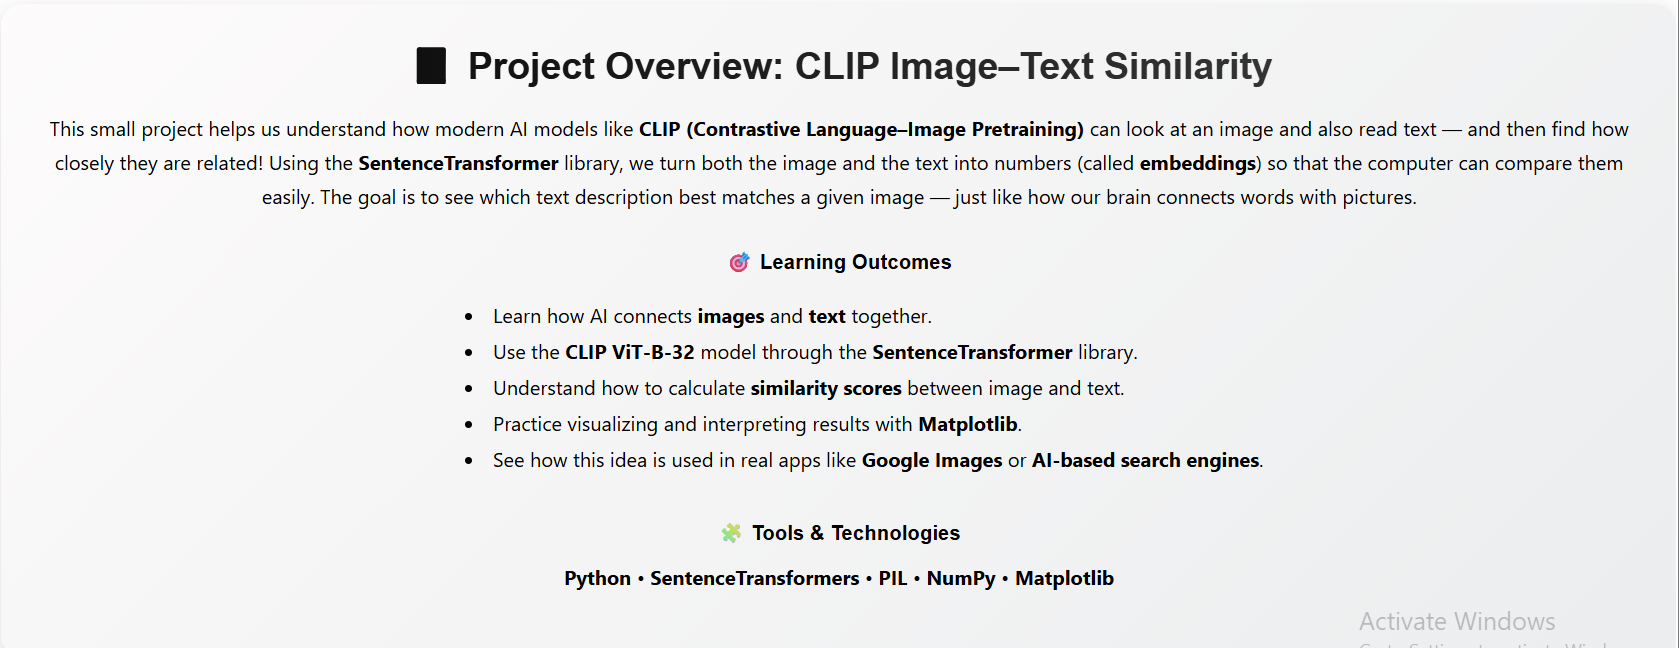

In [2]:
project ="/content/drive/MyDrive/project/Screenshot 2026-02-08 143536.png"
Image.open(project)

In [3]:
image_path="/content/drive/MyDrive/project/cycling on road.jpg"
image1 = Image.open(image_path)

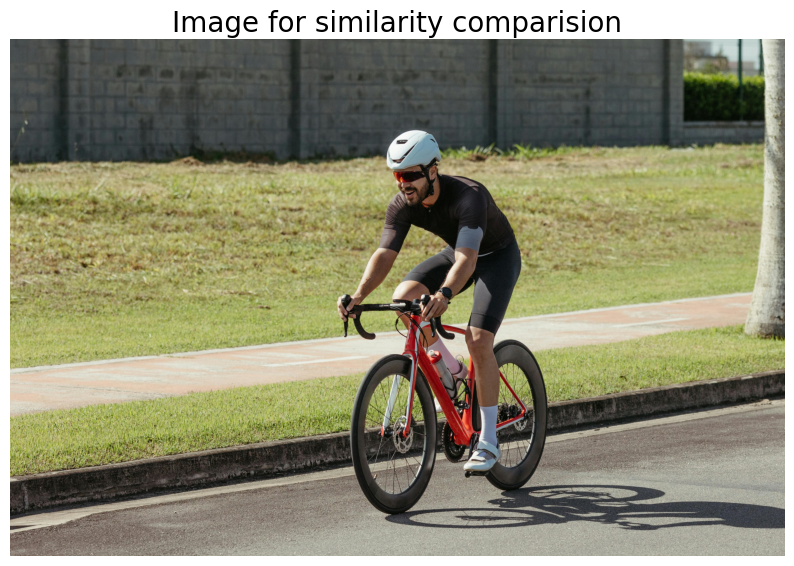

In [4]:
# Display the image
plt.figure(figsize=(10,10))           # make it larger
plt.imshow(image1)                    # display the image data
plt.axis('off')                       # hide axis
plt.title("Image for similarity comparision",fontsize=20)
plt.show()

In [5]:
# YOUR DATA
text_description =[
    "Car parked near the building",
    "A person riding a bicycle on the road",
    "A man cycling on the road during sunset",
    "people sitting on the bicycles",
    "A person riding a bicyle at the forest",
    "Motorcycle racing on track"
]

In [6]:
def display_image_and_compare(image_path,text_description):
  # Load the image
  img = Image.open(image_path)

  # Encode text descriptions and image
  text_emb = model.encode(text_description)
  img_emb = model.encode(img)

  # Compute similarity scores
  similarity_score =np.dot(text_emb,img_emb.T)

  # Find the match
  best_match_idx = np.argmax(similarity_score)
  best_match_desc = text_description[best_match_idx]

  # Print best match info
  print(f"\n best match for the image is : {best_match_desc} with the score of {similarity_score[best_match_idx]:.4f}" )
  # Display the image
  plt.figure(figsize=(10,10))           # make it larger
  plt.imshow(img)                    # display the image data
  plt.axis('off')                       # hide axis
  plt.title("Image for similarity comparision",fontsize=20)
  plt.show()


 best match for the image is : A person riding a bicycle on the road with the score of 26.8143


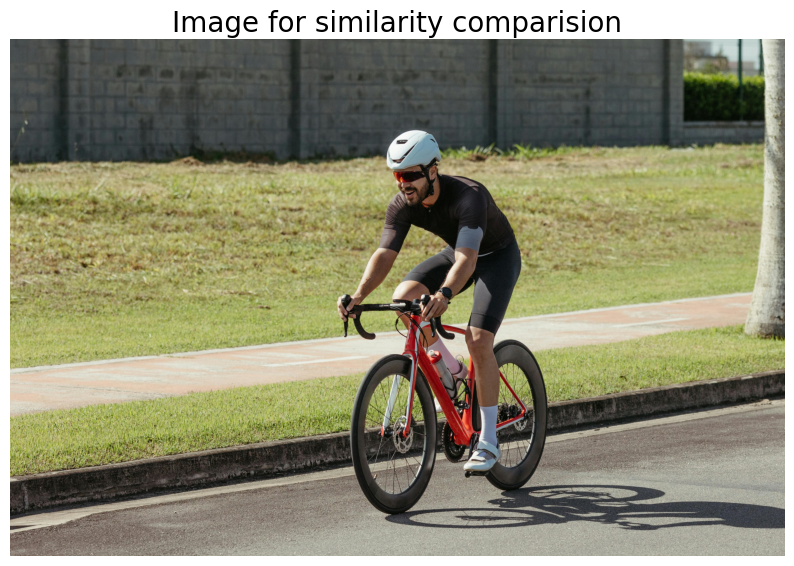

In [7]:
display_image_and_compare(image_path,text_description)



 best match for the image is : Motorcycle racing on track with the score of 27.8592


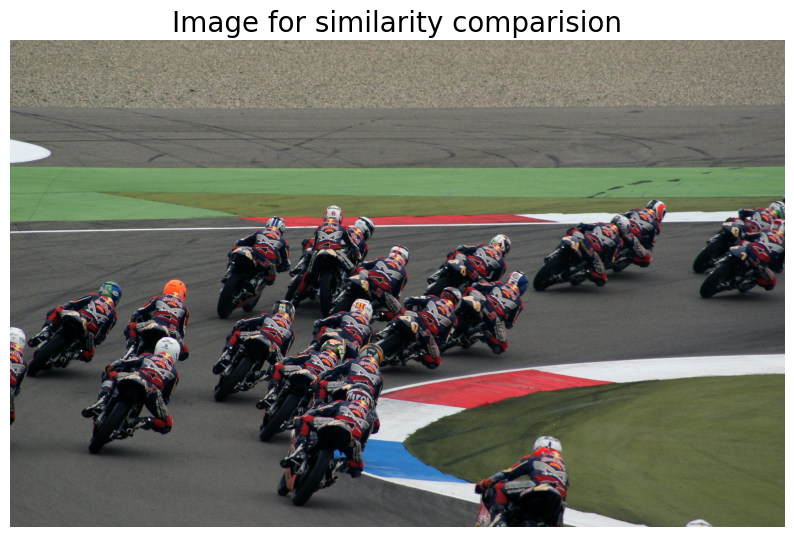

In [8]:
image2="/content/drive/MyDrive/project/motorcycle race.jpg"
display_image_and_compare(image2,text_description)


 best match for the image is : Car parked near the building with the score of 25.4459


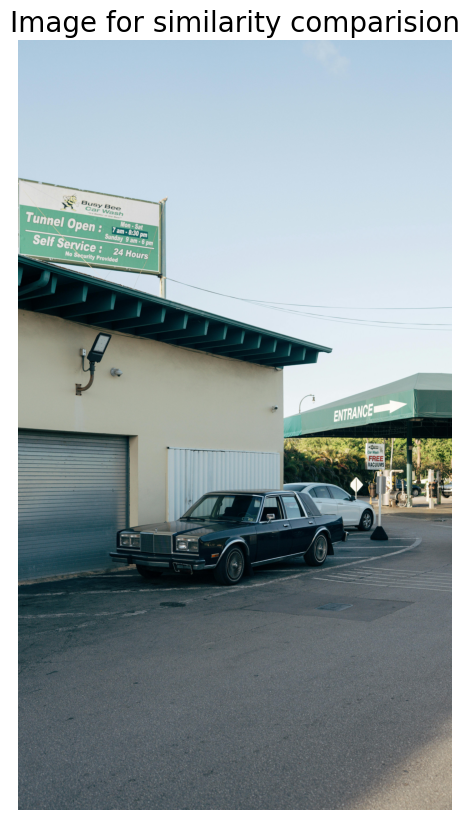

In [9]:
image3="/content/drive/MyDrive/project/car parked.jpg"
display_image_and_compare(image3,text_description)


 best match for the image is : people sitting on the bicycles with the score of 22.5631


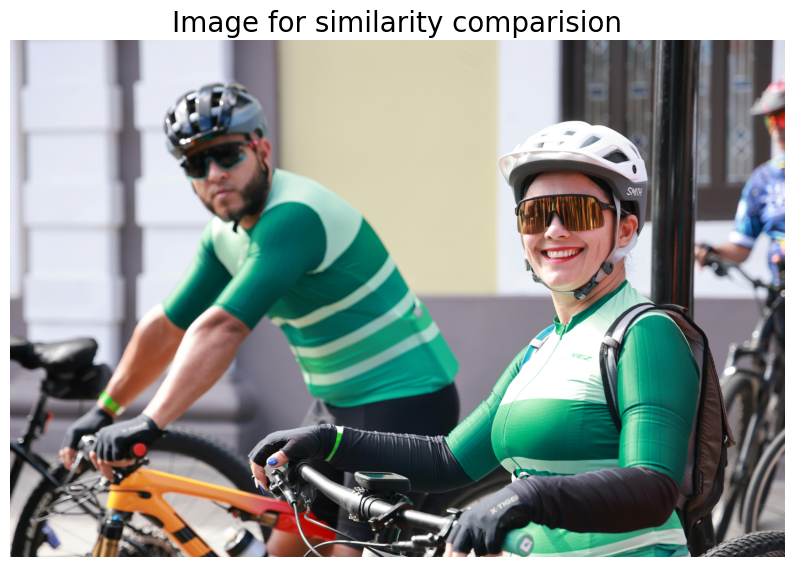

In [10]:
image4="/content/drive/MyDrive/project/sitting people on cycle.jpg"
display_image_and_compare(image4,text_description)


 best match for the image is : A person riding a bicycle on the road with the score of 27.4925


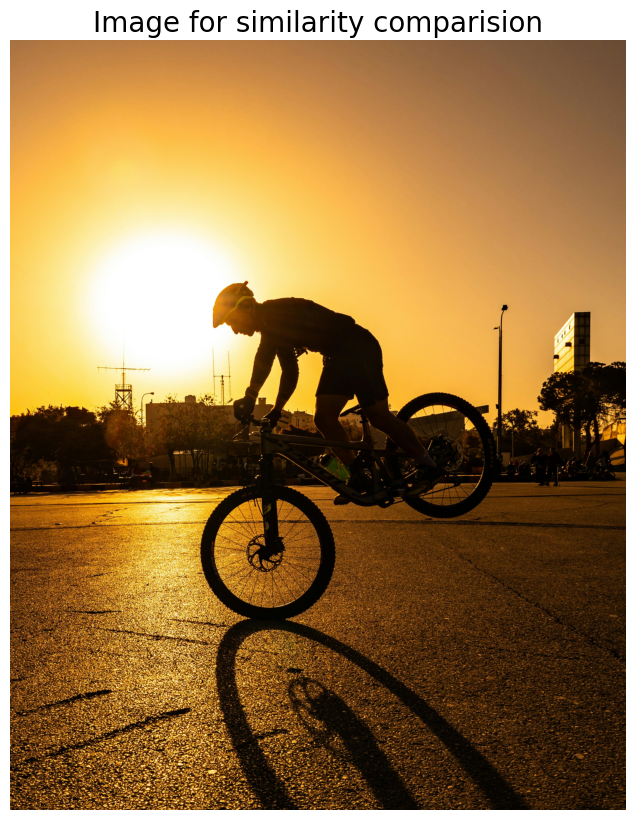

In [11]:
image5="/content/drive/MyDrive/project/cycling during sunset.jpg"
display_image_and_compare(image5,text_description)


 best match for the image is : A person riding a bicyle at the forest with the score of 26.5037


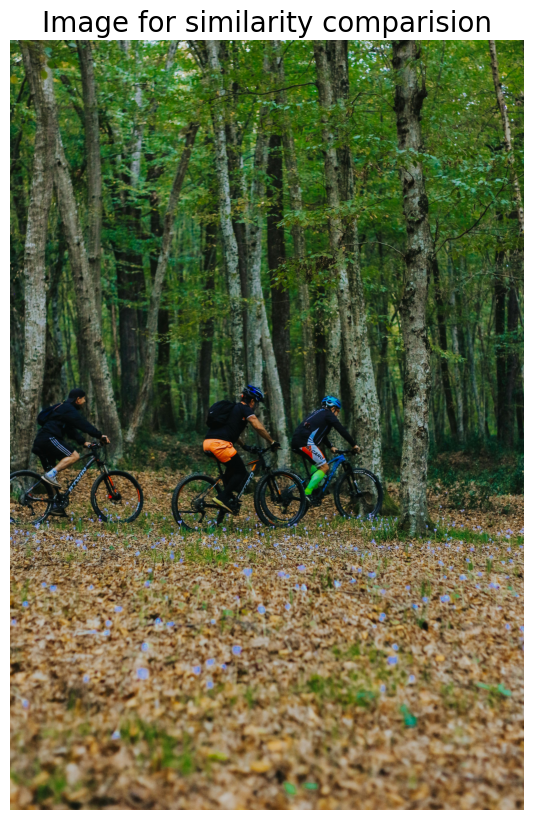

In [12]:
image6="/content/drive/MyDrive/project/cycling at forest.jpg"
display_image_and_compare(image6,text_description)

In [ ]:
from IPython.display import HTML, display
import datetime

def notebook_signature(
    name="Sahil Umar",
    email="sahilumar20948s@gmail.com",
    linkedin="https://www.linkedin.com/in/sahil-umar-a48aa3328/",
    github="https://github.com/sahilumar123",
    contact="+91-8979361341",
    project="CLIP Image–Text Similarity",
    tool="SentenceTransformer + Matplotlib"
):
    today = datetime.date.today().strftime("%B %d, %Y")

    html = f"""
    <div style="
        background: linear-gradient(135deg, #fdfbfb, #ebedee);
        color: #111;
        padding: 25px 35px;
        border-radius: 18px;
        box-shadow: 0 6px 20px rgba(0,0,0,0.15);
        font-family: 'Poppins', 'Segoe UI', sans-serif;
        line-height: 1.7;
        text-align: center;
    ">
        <h2 style="
            margin-top: 0;
            font-size: 28px;
            font-weight: 700;
            color: #111;
        ">
            🤖 {project}
        </h2>

        <p style="font-size: 16px; color: #222;">
            <b>Author:</b> {name}<br>
            <b>Powered by:</b> <span style="color:#000;">{tool}</span><br>
            <b>Date:</b> <span style="color:#000;">{today}</span>
        </p>

        <p style="font-size: 15px; line-height: 1.8; color: #222;">
            📧 <b>Email:</b> <a href="mailto:{email}" style="color:#000; text-decoration:none;">{email}</a><br>
            💼 <b>LinkedIn:</b> <a href="{linkedin}" target="_blank" style="color:#000; text-decoration:none;">{linkedin}</a><br>
            💻 <b>GitHub:</b> <a href="{github}" target="_blank" style="color:#000; text-decoration:none;">{github}</a><br>
            📱 <b>Contact:</b> {contact}
    </div>
    """
    display(HTML(html))

notebook_signature()